# Práctica 3 Regresión lineal en contexto de series de tiempo.

### Profesor: Daniel Jiménez Alcantar


Integrantes.


*   Cortes Moreno Mauricio Hamabiel



### 1. Introduccion

Las series de tiempo son datos secuenciales registrados a intervalos regulares, utilizados para analizar tendencias y realizar predicciones. En este informe, se examina un conjunto de datos de pasajeros aéreos, precargado en Google Colab, con el objetivo de analizar su comportamiento y desarrollar modelos predictivos, en este caso xon regresion lineal en contexto con series de tiempo y modelos autorregresivos como ARIMA, con el objetivo de identificar patrones y realizar predicciones futuras.

###2. Problematica

El tráfico aéreo es un indicador clave en la economía global y está influenciado por factores estacionales, tendencias a largo plazo y eventos inesperados como crisis económicas o pandemias. La predicción precisa del número de pasajeros es crucial para la planificación de aerolíneas y aeropuertos. Se busca determinar tendencias y realizar predicciones futuras mediante modelos estadísticos adecuados.

### 3. Modelo estadistico

El modelo estadístico inicial es la regresión lineal, la cual se basa en la relación entre la variable dependiente (número de pasajeros) y el tiempo. Sin embargo, debido a la naturaleza de las series de tiempo, también se utilizará el modelo ARIMA, que permite capturar patrones de autocorrelación y estacionalidad para mejorar la predicción.

### 4. Modelo computacional

Para el análisis se empleará Python en Google Colab, utilizando librerías especializadas como Pandas, Statsmodels y Scikit-learn. Las herramientas computacionales permitirán realizar visualizaciones, pruebas de estacionariedad, ajuste de modelos y evaluación del rendimiento predictivo.

### 5. Metodologia


*   Carga y exploración de datos: Se analiza la serie de tiempo con visualizaciones para identificar tendencias y estacionalidad.
*   Preprocesamiento: Se transforma la serie para garantizar estacionariedad mediante pruebas de Dickey-Fuller.

*   Regresión Lineal: Se ajusta un modelo de regresión lineal y se evalúa su precisión con métricas como el error cuadrático medio.
*   Modelos de series de tiempo: Se implementan modelos autorregresivos (AR), de promedio móvil (MA) y combinados (ARIMA).
*   Evaluación de resultados: Se comparan los modelos en base a su capacidad predictiva y ajuste a los datos.













### 6. Propuesta de solución para el análisis de una serie de tiempo con regresión lineal.

La regresión lineal proporciona una primera aproximación a la tendencia de la serie de tiempo, pero no captura la estacionalidad ni la autocorrelación presente en los datos. Por ello, se propone emplear modelos de series temporales como ARIMA, que permiten una mejor representación del comportamiento del tráfico aéreo y una mayor precisión en las predicciones.

<ipython-input-6-be81f42e3c94>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


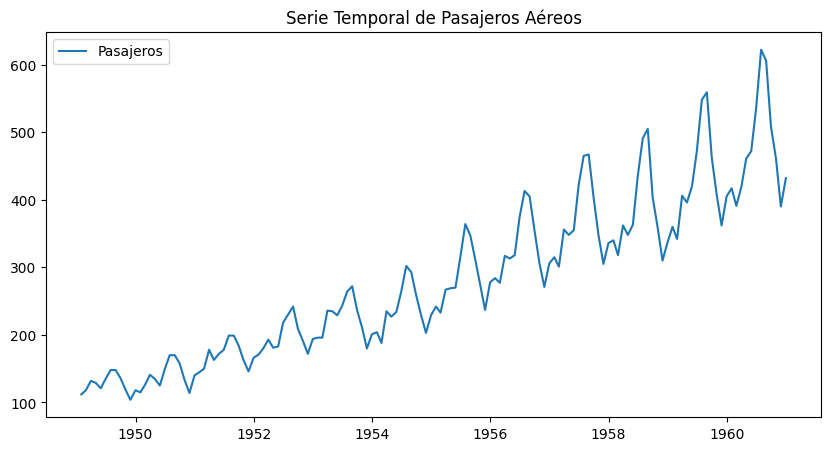

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cargamos el dataset de pasajeros
data = sm.datasets.get_rdataset('AirPassengers', package='datasets').data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)
data.rename(columns={'value': 'Passengers'}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(data['Passengers'], label='Pasajeros')
plt.title('Serie Temporal de Pasajeros Aéreos')
plt.legend()
plt.show()

a. Desarrolla las consideraciones clave que la diferencian del uso estándar de la regresión lineal: Dependencia temporal, la autocorrelación, la estacionariedad y la predicción.

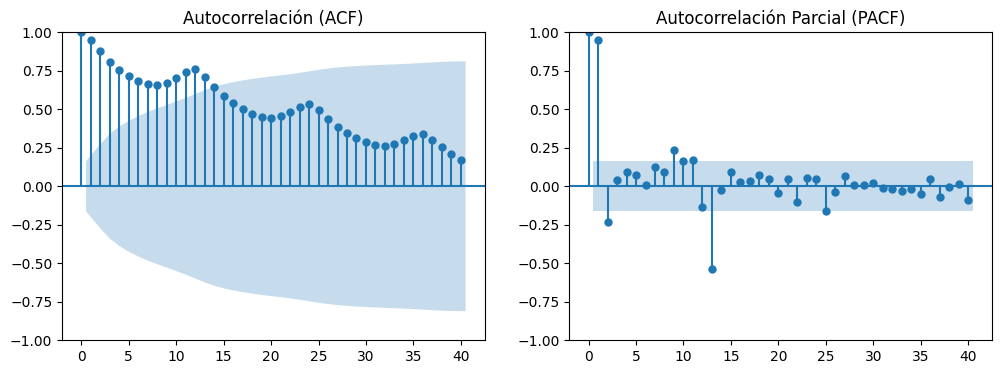

Test Dickey-Fuller:
Test Statistic: 0.8154
p-value: 0.9919
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(data['Passengers'], lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(data['Passengers'], lags=40, ax=axes[1])
axes[0].set_title("Autocorrelación (ACF)")
axes[1].set_title("Autocorrelación Parcial (PACF)")
plt.show()

def dickey_fuller(timeseries):
    result = adfuller(timeseries)
    print('Test Dickey-Fuller:')
    print(f'Test Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:', result[4])
dickey_fuller(data['Passengers'])

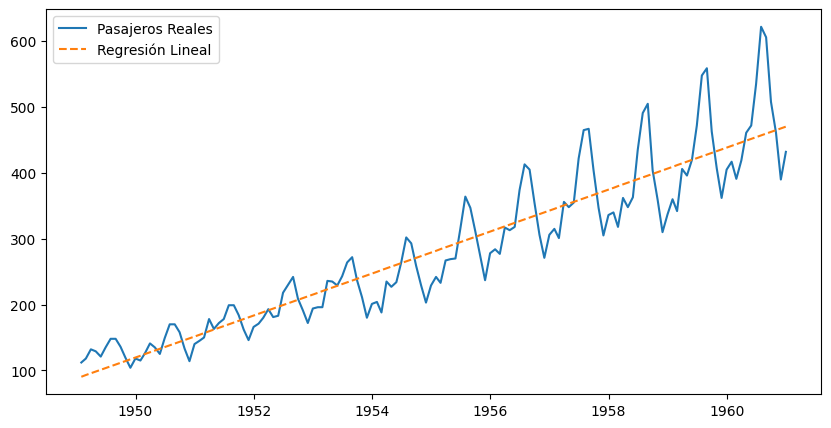

In [5]:
X = np.arange(len(data)).reshape(-1, 1)
y = data['Passengers'].values
reg = LinearRegression().fit(X, y)
data['Linear_Prediction'] = reg.predict(X)

plt.figure(figsize=(10, 5))
plt.plot(data['Passengers'], label='Pasajeros Reales')
plt.plot(data['Linear_Prediction'], label='Regresión Lineal', linestyle='dashed')
plt.legend()
plt.show()

b. Modela la ecuación de regresión del dataset.

In [9]:
#Ecuacion de la recta
b0 = reg.intercept_
b1 = reg.coef_[0]
print(f"Ecuación de regresión: Y_t = {b0:.2f} + {b1:.2f} * t")

Ecuación de regresión: Y_t = 90.31 + 2.66 * t


c. Aplica los modelos de series de tiempo autorregresivos y el modelo ARIMA.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


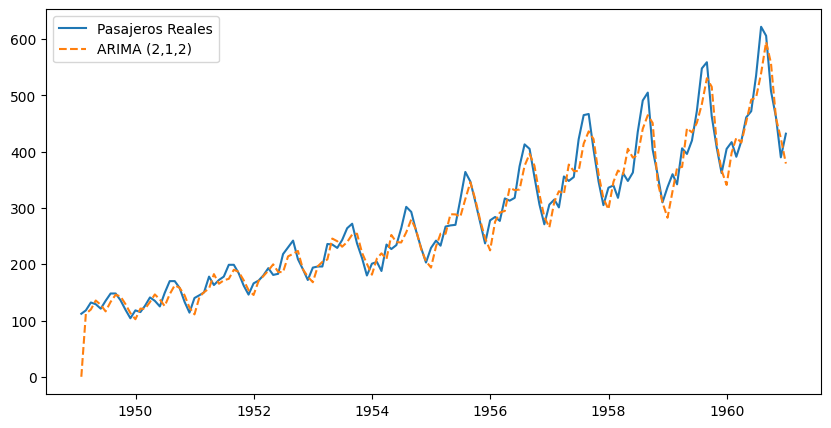

In [11]:
model_arima = ARIMA(data['Passengers'], order=(2,1,2))
model_arima_fit = model_arima.fit()

data['ARIMA_Prediction'] = model_arima_fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(data['Passengers'], label='Pasajeros Reales')
plt.plot(data['ARIMA_Prediction'], label='ARIMA (2,1,2)', linestyle='dashed')
plt.legend()
plt.show()


### 7. Conclusion

En conclusion, a pesar de que la prueba de que los datos muestran clara no estacionariedad con una tendencia ascendente que se ve a simple vista y patrones estacionales, la regresión lineal simple captura solo el componente de tendencia pero pierde la estacionalidad y en el modelo ARIMA proporciona un ajuste mucho mejor al capturar tanto la tendencia como la estacionalidad a pesar de las advertencias.
En este caso, el modelo ARIMA sería más apropiado que el modelo lineal, aunque se debería considerar modelar la estacionalidad como ocupar SARIMA y la fuerte autocorrelación y el patrón estacional puede decirnos que un enfoque de descomposición estacional también podría ser beneficioso.

